In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [31]:
def image_data(X, i):
    """
    Prepares the data for plotting a 28x28 grayscale image of a given observation.

    Args:
        X (np.ndarray): Data matrix of shape (N, p)
        i (int): Index of observation to be visualised

    Returns:
        np.ndarray: reshaped matrix for plotting
    """
    return 255 - X[i].reshape(28, 28)

def indicator(d, v):
    """
    Creates binary class labels based on indicator function condition.

    Args:
        d (np.ndarray): Vector of size N containing observations
        v (np.ndarray): vector of values to classify as 1

    Returns:
        _type_: returns a vector y such that y_i = 1 if d_i is an element of v, -1 otherwise.
    """
    return np.array([1 if di in v else -1 for di in d])

def func_loss(wbar, mu, X, y):
    """
    Compute the loss function that considers sum of hinge losses, and distance between classes

    Args:
        wbar (np.ndarray): vector of size p+1 containing weights
        mu (floet): Regularisation Parameter
        X (np.ndarray): Data matrix of shape (N, p)
        y (np.ndarray): Vector of true class labels of size N

    Returns:
        float: return the value from (2)
    """
    w_0 = wbar[0]
    w = wbar[1:]
    return mu * np.linalg.norm(w, 2)**2 + np.mean(np.maximum(0, 1 - y * (w_0 + X.dot(w))))

def grad_loss(wbar, mu, X, y):
    """
    Compute the subgradient of loss function (2)

    Args:
        wbar (np.ndarray): vector of size p+1 containing weights
        mu (float): Regularisation Parameter
        X (np.ndarray): Data matrix of shape (N, p)
        y (np.ndarray): Vector of true class labels of size N

    Returns:
        np.ndarray: the subgradient from (3)
    """
    w_0 = wbar[0]
    w = wbar[1:]
    N = X.shape[0]
    mask = 1 - y * (w_0 + X.dot(w)) >= 0
    
    subgradient = np.zeros(len(wbar))
    subgradient[0] = 1 / N * np.sum(-y[mask])
    subgradient[1:] = 2 * mu * w - 1 / N * (X[mask].T @ y[mask]) 
    return subgradient

def svm(alpha, epsilon, mu, X, y):
    """
    Train the SVM using subgradient descent.

    Args:
        alpha (float): step size for subgradient descent.
        epsilon (_type_): tolerance for loss difference.
        mu (_type_): Regularisation parameter
        X (np.ndarray): Data matrix of shape (N, p)
        y (np.ndarray): Vector of true class labels of size N

    Returns:
        visited_iterates (np.ndarray): a matrix whose columns are the visited iterates, exluding the starting point.
    """
    k = 0
    N, p = X.shape
    wbar_current = np.zeros(p + 1)
    wbar_prev = wbar_current.copy()
    
    visited_iterates = []
    
    while k <= 1 or np.abs(func_loss(wbar_current, mu, X, y) - func_loss(wbar_prev, mu, X, y)) > epsilon:
        r = grad_loss(wbar_current, mu, X, y)
        wbar_prev = wbar_current
        wbar_current = wbar_current - alpha * r
        visited_iterates.append(wbar_current.copy())
        k += 1
    return np.array(visited_iterates).T

def svm_accuracy(wbar, X, y):
    """
    Returns the accuracy of the support vector machine with parameter \bar{w} on the data in X, with the data's true classes stored in y.
    
    Args:
        wbar: (p+1)x1 vector containing weights
        X (np.ndarray): Data matrix of shape (N, p)
        y (np.ndarray): Vector of true class labels of size N
    Returns:
        propostion of correctly classified observations
    """
    w_0 = wbar[0]
    w = wbar[1:]
    
    y_hat = np.where(w_0 + np.dot(X, w) >= 0, 1, -1)
    return np.mean(y_hat == y)

def train_test_split(X, y, beta):
    """
    Divide the observations (and associated classifications) into training observations and testing observations in proportion to \beta.
    
    Args:
        X (np.ndarray): Data matrix of shape (N, p)
        y (np.ndarray): Vector of true class labels of size N
    
    Returns:
        tuple: (X_train, y_train, X_test, y_test)
    """
    N,p = X.shape
    N_train = int(np.floor(beta * N))
    N_test = int(N - np.floor(beta * N))
    
    all_indices = list(range(N))
    train_indices = random.sample(all_indices, N_train)
    test_indices = list(set(all_indices) - set(train_indices))
    
    train_indices.sort(), test_indices.sort()
    X_train = X[train_indices]
    y_train = y[train_indices]
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    return X_train, y_train, X_test, y_test

def accuracies(X, y):
    """
    Compute the in-sample and out-of-sample accuracies for SVM model.
    
    - First use train_test_split to split the input data into a training and testing data with \beta = 0.7;
    - Use svm to train a support vector machine on the training data with \alpha = 10e-5, \epsilon = 10e-2, and \mu = 10e-1;
    - Compute the in-sample and out-of-sample accuracies for the resulting model.
    
    Args:
        X (np.ndarray): Data matrix of shape (N, p)
        y (np.ndarray): Vector of true class labels of size N

    Returns:
        tuple: (in_sample_accuracy, out_of_sample_accuracy)
    """
    beta = 0.7
    X_train, y_train, X_test, y_test = train_test_split(X, y, beta)
    
    alpha = 1e-5
    epsilon = 1e-2
    mu = 1e-1
    iterates = svm(alpha, epsilon, mu, X_train, y_train)
    
    final_wbar = iterates[:, -1]
    
    in_sample_accuracy = svm_accuracy(final_wbar, X_train, y_train)
    out_of_sample_accuracy = svm_accuracy(final_wbar, X_test, y_test)
    
    return in_sample_accuracy, out_of_sample_accuracy

In [32]:
data = pd.read_csv('handwriting.csv')

d = data.iloc[:, 0].values
X = data.iloc[:, 1:].values
y = indicator(d, v=[0, 2, 4, 6, 8])

In [33]:
accuracies(X, y)

(0.8033266437633934, 0.7954130624553607)

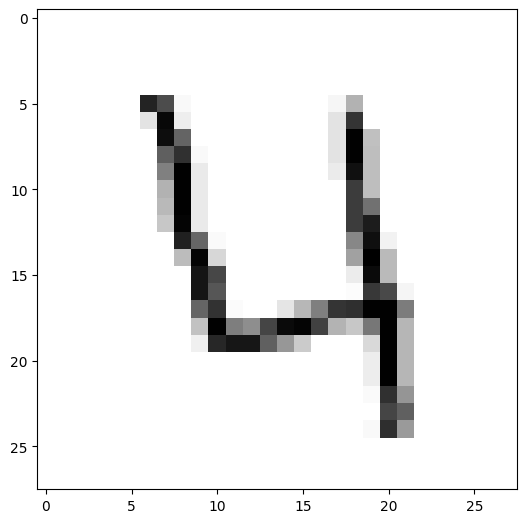

In [34]:
axes = plt.figure().add_axes((0, 0, 1, 1))
i=3
axes.imshow(image_data(X, i), cmap='gray')
plt.show()

In [29]:
import unittest

class TestImageData(unittest.TestCase):
    def setUp(self):
        """
        Initialize common variables for the tests.
        """
        # Create a sample X with N=5 observations and p=784 features
        self.N = 5
        self.p = 784
        self.X = np.random.randint(0, 256, size=(self.N, self.p))
        self.valid_index = 2  # A valid index within range
        self.invalid_index = 10  # An index out of range for testing
        
        # Create a sample observation with known values for deterministic testing
        self.sample_observation = np.arange(784).reshape(1, 784)
        self.X_sample = np.vstack([self.X, self.sample_observation])  # Now X has shape (6, 784)
        self.i_sample = 5  # Index of the known observation
    
    def test_correct_return_type(self):
        """
        Test that image_data returns a NumPy ndarray.
        """
        img = image_data(self.X, self.valid_index)
        self.assertIsInstance(img, np.ndarray, "The return type should be a NumPy ndarray.")
    
    def test_correct_shape(self):
        """
        Test that the returned array has the shape (28, 28).
        """
        img = image_data(self.X, self.valid_index)
        self.assertEqual(img.shape, (28, 28), "The reshaped image should have shape (28, 28).")
    
    def test_pixel_value_range(self):
        """
        Test that all pixel values are within the range [0, 255].
        """
        img = image_data(self.X, self.valid_index)
        self.assertTrue(np.all(img >= 0) and np.all(img <= 255),
                        "All pixel values should be between 0 and 255.")
    
    def test_datatype_uint8(self):
        """
        Test that the returned array has dtype uint8.
        """
        img = image_data(self.X, self.valid_index)
        self.assertEqual(img.dtype, np.uint8, "The image data should be of type uint8.")
    
    def test_imshow_compatibility(self):
        """
        Test that the image can be plotted using imshow without errors.
        """
        img = image_data(self.X, self.valid_index)
        try:
            plt.imshow(img, cmap='gray')
            plt.close()  # Close the plot to prevent it from displaying
        except Exception as e:
            self.fail(f"imshow raised an exception: {e}")
    
    def test_known_output(self):
        """
        Test that a known input produces the expected output.
        """
        img = image_data(self.X_sample, self.i_sample)
        expected_img = np.arange(784).reshape(28, 28).astype(np.uint8)
        np.testing.assert_array_equal(img, expected_img, "The reshaped image does not match the expected output.")
    
    def test_invalid_index(self):
        """
        Test that the function raises an error when an invalid index is provided.
        """
        with self.assertRaises(IndexError):
            image_data(self.X, self.invalid_index)
if __name__ == '__main__':
    unittest.main()


usage: ipykernel_launcher.py [-h] [-v] [-q] [--locals] [-f] [-c] [-b]
                             [-k TESTNAMEPATTERNS]
                             [tests ...]
ipykernel_launcher.py: error: argument -f/--failfast: ignored explicit argument '/Users/sanjayvonk/Library/Jupyter/runtime/kernel-v3281f20d47ba1418f375d67df36c9c815e312527c.json'


AttributeError: 'tuple' object has no attribute 'tb_frame'